# Financial fraud detection using banking data by machine learning techniques




In [ ]:
# Importing necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the CSV file containing banking data into a pandas DataFrame called df.
df=pd.read_csv('data/Fraud.csv')

# Displaying the column names of the DataFrame df
df.columns

In [ ]:
# Getting the dimensions (rows, columns) of the DataFrame df
df.shape

In [ ]:
# Getting the total number of elements in the DataFrame df.
df.size

In [ ]:
# Displaying the first few rows of the DataFrame df.
df.head()

In [ ]:
# Displaying the last few rows of the DataFrame df
df.tail()

In [ ]:
# Displaying a random sample of 5 rows from the DataFrame df.
df.sample(5)

In [ ]:
# Displaying the data types of each column in the DataFrame df.
df.dtypes

In [ ]:
# Setting the display format for floating-point numbers in the DataFrame.
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

# Generating descriptive statistics for selected numerical columns in the DataFrame df and rounding them to two decimal places.

round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

In [ ]:
# Calculating the correlation matrix for selected columns in the DataFrame df.

df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

In [ ]:
# Filtering the DataFrame df to show only rows where the 'amount' column is equal to 0, indicating potentially fraudulent transactions with no amount transferred.
df[df['amount']==0]

# because when the account has no money then there is no sense of amount tranfer. So it is a fraud transaction.

In [ ]:
df[df['isFlaggedFraud']==1]

In [ ]:
# Filtering the DataFrame df to show only rows where both the 'amount' column is equal to the 'oldbalanceOrg' column and the 'isFraud' column is equal to 1
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]


# If the value of amount matches oldbalanceOrg, it indicates fraudulent transactions.
# This suggests that when fraudulent actors know the balance of the target account, 
# their aim is to transfer the entire account balance to their designated destination accounts.


# Data Preprocessing

In [ ]:
Data preprocessing resolves issues like missing values, duplicates, outliers, and multicollinearity. It balances the dataset for class imbalance, especially between fraudulent and non-fraudulent transactions. Feature selection removes irrelevant attributes, while encoding categorical features for modeling compatibility, refining the dataset for analysis.

In [ ]:
# Checking for null values in each column of the DataFrame df and summing them up.
df.isnull().sum()

In [ ]:
# Checking for duplicate rows in the DataFrame df.
df[df.duplicated()]

In [ ]:
# Counting the total number of duplicate rows in the DataFrame df.
df.duplicated().sum()

In [ ]:
# Counting the frequency of each unique value in the 'isFraud' column of the DataFrame df, which represents the target variable indicating fraudulent transactions.
df['isFraud'].value_counts()

# Exploratory Data Analysis ( EDA )

In [ ]:
# Exploratory Data Analysis (EDA) is an essential preliminary step in the process of understanding and analyzing a dataset for financial fraud detection using machine learning techniques

In [ ]:
df.columns

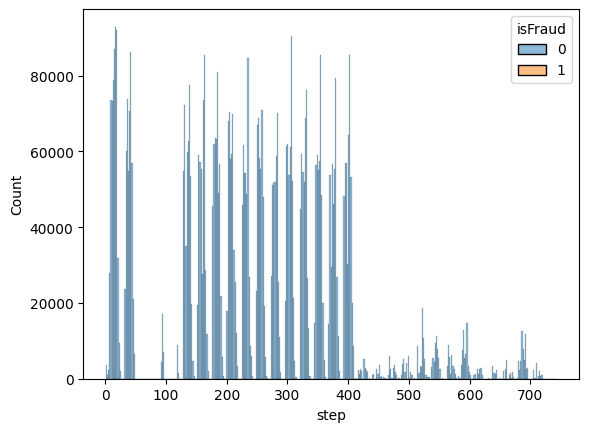

In [28]:
sns.histplot(x='step', data=df,hue='isFraud');




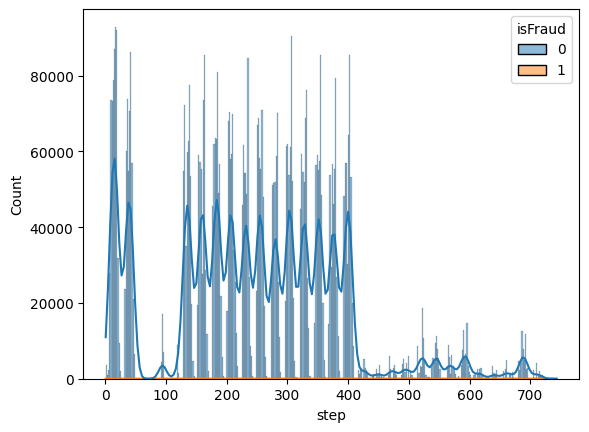

In [31]:
sns.histplot(x='step', data=df, hue='isFraud', kde=True, fill=True)
plt.show()

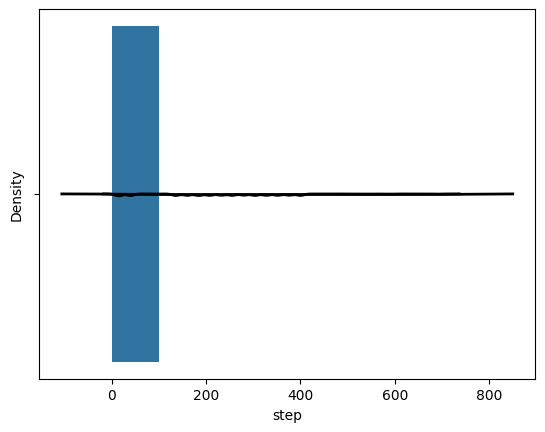

In [32]:
# Create the bar plot
sns.barplot(x='step', y=None, data=df, hue='isFraud', estimator=lambda x: len(x) / len(df) * 100)

# Overlay the kernel density curve
for category in df['isFraud'].unique():
    sns.kdeplot(df[df['isFraud'] == category]['step'], color='k', linestyle='-', linewidth=2)

plt.show()

It is difficult to identify fraud transcation time duration,<br>
but we noticed that most of the transactions are below 400 time unit<br>
where 1 time unit = 1 hr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11168\185465379.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='isFraud', y='step', data=df, ci=None, palette=colors)


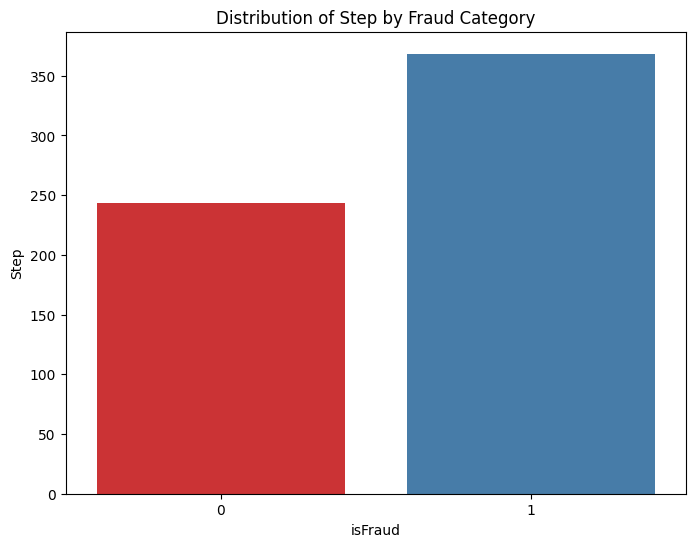

In [27]:
# Increase the size of the plot
plt.figure(figsize=(8, 6))

# Customize the color palette for better visibility
colors = sns.color_palette("Set1")

# Create the bar plot
sns.barplot(x='isFraud', y='step', data=df, ci=None, palette=colors)

# Add labels and title
plt.xlabel('isFraud')
plt.ylabel('Step')
plt.title('Distribution of Step by Fraud Category')

# Show the plot
plt.show()


<Axes: xlabel='amount'>

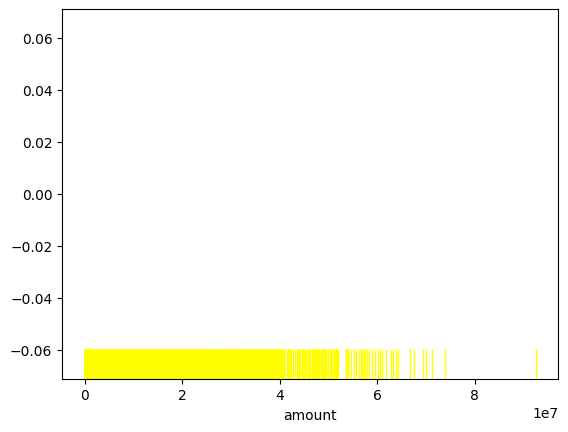

In [34]:
# Creating a rug plot using seaborn (sns) to visualize the distribution of the 'amount' feature (transaction amount) in the DataFrame df
sns.rugplot(x='amount', data=df, height=.08, color='yellow')

Most of the transaction amounts are small amount and <br>
very few transactions are having large amount transfer. <br>
Thus, their is higher probability that these transactions may be done by fraudulent agents.

In [ ]:
colors = ['red']
sns.swarmplot(x='amount', data=df, palette=colors)
plt.show()

In [32]:

df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

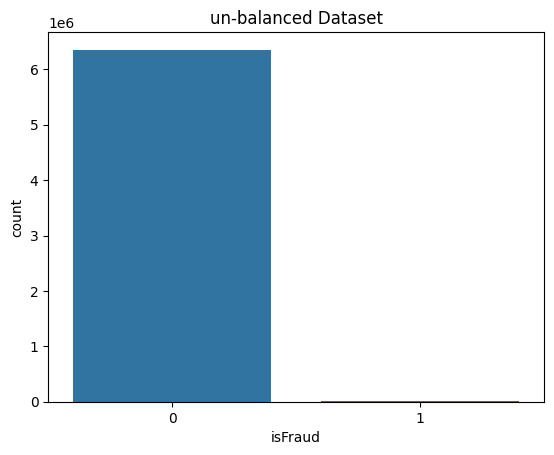

In [33]:

sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced. <br>
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted. <br>
Need to handle this , otherwise it will impact our model Training. <br>

In [34]:

df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

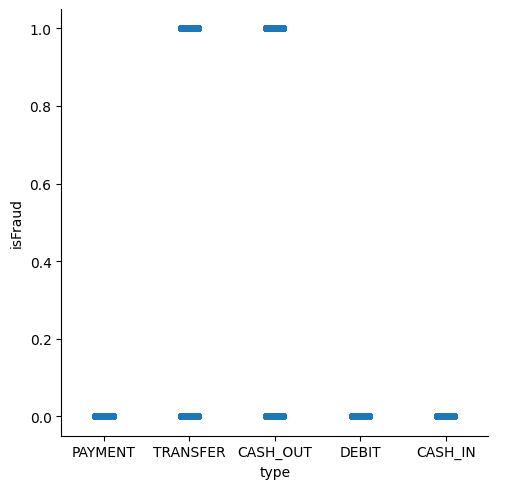

In [35]:

sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [36]:

df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [37]:

df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans.
becuase 100% fraud transactions are lie inside these two types.

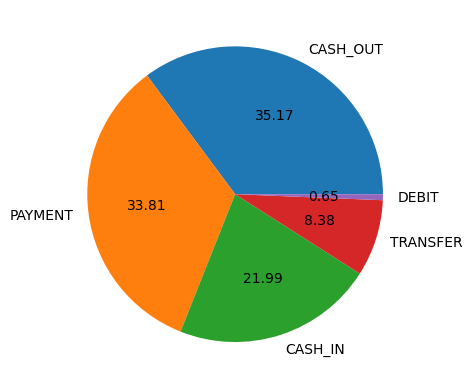

In [38]:


# Calculating individal % of each category of 'type' column in our transactions
#   using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT", <br>
    due to which fraudulent agents targeted these two type.

### Outliers Detection 

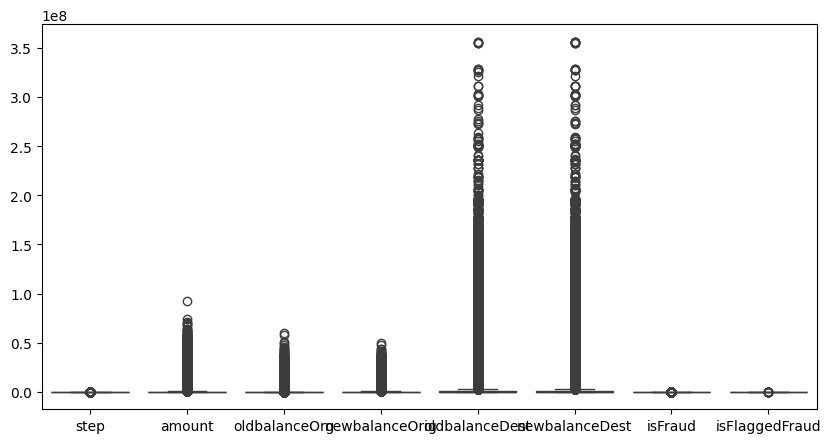

In [39]:

fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [40]:


# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [41]:

df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


There are more than 100 thousand records considered as outlier in "step" feature .<br>
we can't remove these records , because of value.<br>

and , <br>
other independent features (numeric ) are denotes amount ( money transaction ), <br>
thus removing these column is not good option.<br>
becuase higher amount may have higher probability to denote fraud transaction.

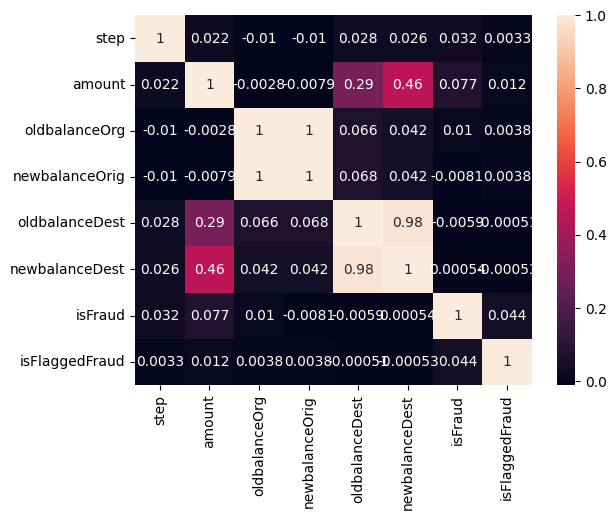

In [42]:


sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

1) Their is multi_collinearity between 4 independent features
<h6> ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
    ( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988  </h6>
Need to remove one from each of two correlation <br>
<br>
2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest', <br>
becuase they are less correlated with dependent feature ( "isFraud"), <br>
as compare to other two one.

In [43]:


# df.corr()["isFraud"]  
df.corr(numeric_only=True)["isFraud"]


step              0.0316
amount            0.0767
oldbalanceOrg     0.0102
newbalanceOrig   -0.0081
oldbalanceDest   -0.0059
newbalanceDest    0.0005
isFraud           1.0000
isFlaggedFraud    0.0441
Name: isFraud, dtype: float64

# Feature selection 

In [44]:


# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):
    
    """ 
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()
    
    # storing correlation matrix
    corr_matrix=dataset.corr()
    
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            
            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:
                
                # if true, then fateching column name
                colname=corr_matrix.columns[i]
                
                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr


In [48]:
# # calling ... with threshold value 0.9
# corr_matrix = df.corr(numeric_only=True)

# correlated_features=correlation(df,0.9)

# Calculate correlation matrix with numeric_only=True
corr_matrix = df.corr(numeric_only=True)

# Find correlated features based on a threshold of 0.9
correlated_features = correlation(corr_matrix, 0.9)

# Define function to find correlated features
def correlation(corr_matrix, threshold):
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features


In [49]:
# total number of un_important features
len(set(correlated_features))

2

In [50]:

# name of these columns ( independent features)
correlated_features

{'newbalanceDest', 'newbalanceOrig'}

In [51]:

# Removing these features from DataFrame.

df=df.drop(correlated_features,axis=1)

In [54]:

# After removing ...
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,M1979787155,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,M2044282225,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,C553264065,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,C38997010,21182.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,M1230701703,0.0000,0,0


<h4>Checking variations of data in features </h4> 

if variation is zero (0) , means that column ( feature ) is not <br>
having any correlation with dependent features.
and we need to remove that column.

In [55]:


from sklearn.feature_selection import VarianceThreshold

In [56]:


"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

True :- having variations <br>
False :- not having variations

In [57]:

# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

'isFlaggedFraud' feature having Low_variation in data , <br>
but we can't remove that column, because it  contain these two values (0,1) <br>
which helps to identify whether our transc. is fraud or not <br>
and ,<br>
<br>
it also shows good correlationship with dependent feature ( target feature ) <br>
Thus removing this feature is not good option.

<h4> Checking whether categorical features are useful or not </h4> 

In [58]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
nameDest           object
oldbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

we have 3 categorical features "type" , "nameOrig" , "nameDest"

In [59]:

print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


we have 4 unique values in "type" feature,<br>

and "nameOrig" and "nameDest" contain more unique values <br>
Lets check their count...

In [60]:

df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [61]:

df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

most of the data inside "nameOrig" and "nameDest" <br>
are unique ( approx 90% and 60% ), means it will be not useful for model training .<br>
Thus, good option is to remove them.<br>
and even their are just Account names.

In [62]:

df=df.drop({'nameOrig','nameDest'},axis=1)

In [63]:

df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,21182.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,0.0000,0,0


# Feature Encoding

There is only one categorical column ( feature ) which is "type"

In [64]:

df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [65]:

df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

We will replace large count class with bigger numeric number, <br>
so, it will helps model for batter understanding of data pattern while training

In [66]:

df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [67]:

df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
4,1,4,11668.1400,41554.0000,0.0000,0,0


In [68]:

df["type"].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [69]:

df["type"].value_counts()

type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

# Handling Un-Balanced Data

In [70]:

df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [71]:

"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [72]:

normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,0.0000,0,0


In [73]:

fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,26202.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,1,0


In [74]:

print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [75]:

# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [76]:

"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [77]:

normal_transaction['amount'].describe()

count       8213.0000
mean      190645.9021
std       540867.6332
min            4.9500
25%        14712.5200
50%        81322.1600
75%       216129.2200
max     17940847.0100
Name: amount, dtype: float64

mean of normal transaction is less as compare to fraud trans.

In [78]:

fraud_transaction['amount'].describe()

count       8213.0000
mean     1467967.2991
std      2404252.9472
min            0.0000
25%       127091.3300
50%       441423.4400
75%      1517771.4800
max     10000000.0000
Name: amount, dtype: float64

mean of fraud transaction is higher then normal trans.

In [80]:


# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [81]:

new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
3652189,275,4,10722.3500,0.0000,0.0000,0,0
1961805,178,3,202994.9400,2145882.5800,2678251.0600,0,0
995544,45,3,140082.6900,137.0000,0.0000,0,0
3777424,280,4,1403.2400,0.0000,0.0000,0,0
6073341,514,4,16596.3600,1390.0000,0.0000,0,0


In [82]:

new_df.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,68488.8400,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,6510099.1100,1,0


NOTICED:-
"Fraud_transcation" dataset added at the end of "normal_transcation" dataset

In [83]:

new_df.shape

(16426, 7)

# Train-Test Split

In [84]:


# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [85]:
X.shape

(16426, 6)

In [86]:

y.shape

(16426,)

In [87]:

from sklearn.model_selection import train_test_split

In [88]:

# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [89]:

print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [90]:

y_test.value_counts()

isFraud
0    1643
1    1643
Name: count, dtype: int64

In [91]:

y_train.value_counts()

isFraud
1    6570
0    6570
Name: count, dtype: int64

Our "isFraud" values are evenly distributed amoungs training and testing data.

# Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()

In [94]:
scaler.fit(x_train)

StandardScaler()

In [95]:
x_train_scaler=scaler.transform(x_train)

In [96]:
x_test_scaler=scaler.transform(x_test)

In [97]:
x_train_scaler

array([[-0.58764659, -1.3340422 , -0.38706888, -0.3456164 , -0.25455889,
        -0.0302337 ],
       [-0.29884853, -1.3340422 , -0.30179966, -0.29593997, -0.25455889,
        -0.0302337 ],
       [ 1.94965064,  0.9906978 ,  4.95004895,  2.76369961, -0.23756646,
        -0.0302337 ],
       ...,
       [-1.49014052,  0.9906978 , -0.42177969, -0.37765267,  0.30359097,
        -0.0302337 ],
       [ 0.38704686,  0.9906978 ,  0.34272301,  0.07954821, -0.25455889,
        -0.0302337 ],
       [ 0.83571527,  0.9906978 ,  1.9363008 ,  1.00794011, -0.197596  ,
        -0.0302337 ]])

In [98]:
x_test_scaler

array([[ 0.50050324, -0.55912887, -0.31898161, -0.37380484, -0.22442562,
        -0.0302337 ],
       [-1.38699836, -0.55912887, -0.42423382, -0.10142769, -0.21667938,
        -0.0302337 ],
       [-0.37104805,  0.21578447, -0.43227893, -0.38124011, -0.25455889,
        -0.0302337 ],
       ...,
       [ 0.50050324,  0.9906978 , -0.39884318, -0.38124011,  0.16498098,
        -0.0302337 ],
       [-0.2163348 , -0.55912887, -0.29687249,  1.87975907, -0.0745193 ,
        -0.0302337 ],
       [-1.30964174,  0.9906978 , -0.3946987 , -0.3500614 , -0.24585218,
        -0.0302337 ]])

# Training and Evaluating model

### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log_model=LogisticRegression()

In [101]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [102]:
y_pred=log_model.predict(x_test_scaler)

In [103]:
# for accuracy check :- 

from sklearn.metrics import accuracy_score

In [104]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
77.75410833840536
- - - - - - - - - - -


### Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rand_model=RandomForestClassifier()

In [107]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [108]:
y_pred=rand_model.predict(x_test_scaler)

In [109]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.56968959220937
- - - - - - - - - - -


### Support Vector Machine ( SVM )

In [110]:
from sklearn.svm import SVC

In [111]:
svm_model=SVC()

In [112]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [113]:
y_pred=svm_model.predict(x_test_scaler)

In [100]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
89.28788800973828
- - - - - - - - - - -


### BernoulliNB

In [114]:
from sklearn.naive_bayes import BernoulliNB

In [115]:
bnb_model=BernoulliNB()

In [116]:
bnb_model.fit(x_train_scaler,y_train)

BernoulliNB()

In [117]:
y_pred=bnb_model.predict(x_test_scaler)

In [118]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
69.84175289105295
- - - - - - - - - - -


### GaussianNB

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
gnb_model=GaussianNB()

In [121]:
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [122]:
y_pred=gnb_model.predict(x_test_scaler)

In [123]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
56.84723067559343
- - - - - - - - - - -


<h3> Conclusion </h3>

Random Forest Classifier  Selected

# Preparing Model for deployment

In [124]:
import pickle

In [125]:
pickle.dump(rand_model,open('model.sav','wb'))

In [126]:
#### Saving the StandadrdScaler object 'scaler'

pickle.dump(scaler,open('scaler.sav','wb'))

<h3>Let's check whether our model working fine or not ?</h3> 


In [114]:
rand_model=pickle.load(open('model.sav','rb'))

In [127]:
# loading the scaler file for scaling input array
new_scaler=pickle.load(open('scaler.sav','rb'))

In [128]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
3652189,275,4,10722.3500,0.0000,0.0000,0,0
1961805,178,3,202994.9400,2145882.5800,2678251.0600,0,0
995544,45,3,140082.6900,137.0000,0.0000,0,0
3777424,280,4,1403.2400,0.0000,0.0000,0,0
6073341,514,4,16596.3600,1390.0000,0.0000,0,0


In [129]:
# creating ndarray to pass this array as an input data
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [130]:
# scaling the input_array datapoints

input_array_scale=new_scaler.transform(input_array)
input_array_scale

C:\Users\Prangya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4071478 ,  0.9906978 , -0.38475302, -0.38124011, -0.19132905,
        -0.0302337 ]])

In [131]:
pred=rand_model.predict(input_array_scale)
pred

array([0], dtype=int64)

Prediction is correct :)